##PIL - библиотека Python Imaging Library


In [3]:
from PIL import Image

In [4]:
pil_im = Image.open("222.jpg")

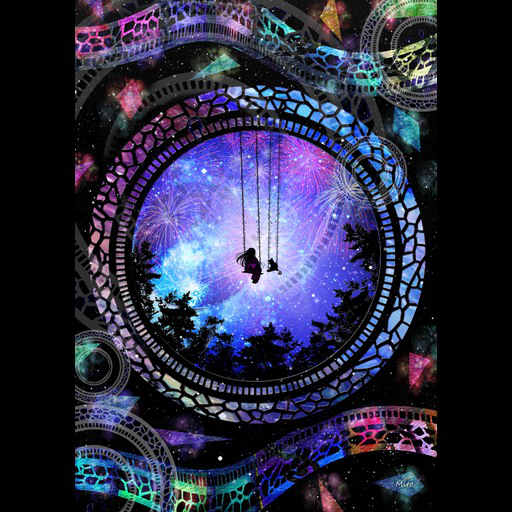

In [5]:
pil_im

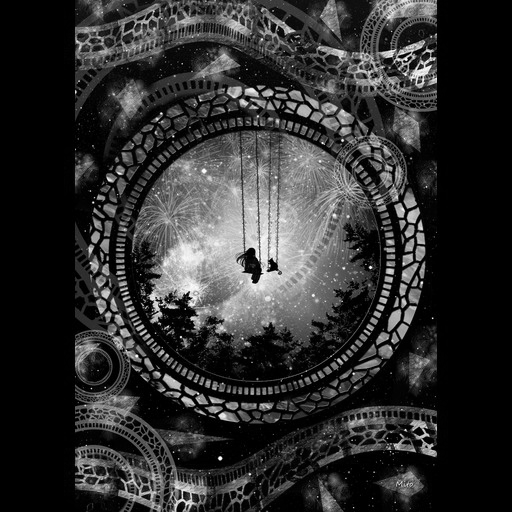

In [6]:
pil_im.convert("L")

In [7]:
import os
pil_im.filename

'222.jpg'

In [8]:
def save_jpg(img : Image):
  try:
    img.save(img.filename.split('.')[0] + "_copy.jpg")
  except IOError:
    print("bad request")

In [9]:
save_jpg(pil_im)

In [10]:
pil_im.thumbnail((128, 128))

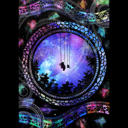

In [11]:
pil_im

In [12]:
pil_im = Image.open("222.jpg")

In [13]:
box = (90, 90, 420, 420)
region = pil_im.crop(box=box)

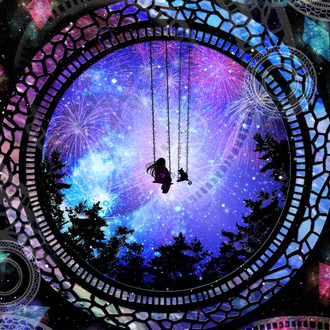

In [14]:
region

In [15]:
region = region.rotate(180)
pil_im.paste(region, box)

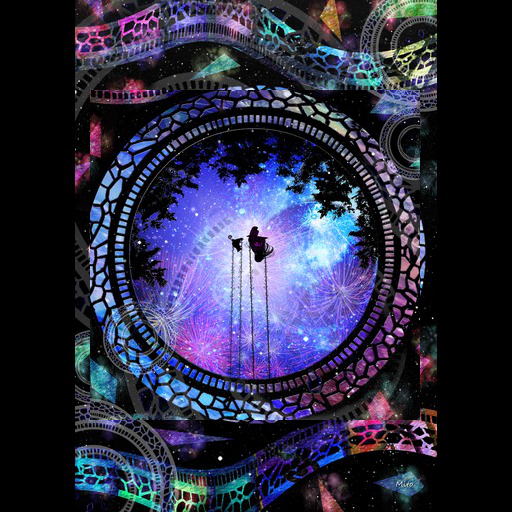

In [16]:
pil_im

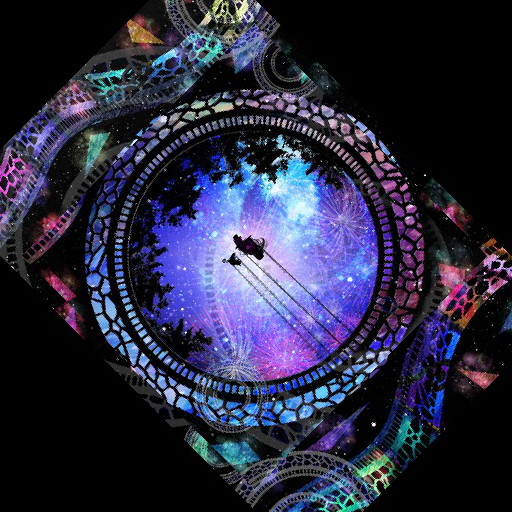

In [17]:
out = pil_im.resize((128, 128))
out = pil_im.rotate(45)
out

##Библиотека Matplotlib

In [18]:
from pylab import *

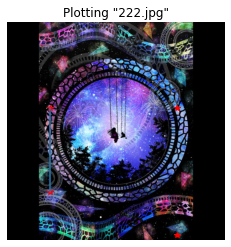

In [19]:
im = array(Image.open("222.jpg"))
imshow(im)

x = (100, 100, 400, 400)
y = (200, 400, 200, 500)
axis("off")
plot(x, y, "r*")
plot(x[:2], y[:2])
title('Plotting "222.jpg"')
show()

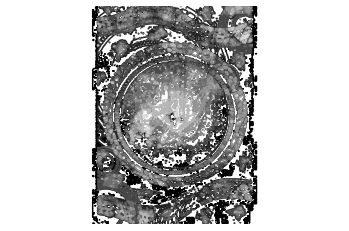

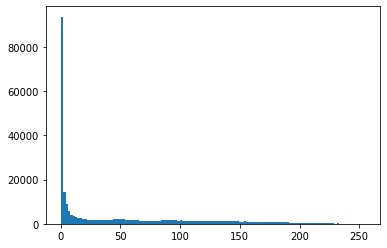

In [20]:
im = array(Image.open("222.jpg").convert("L"))

figure()
gray()

contour(im, origin="image")
axis("equal")
axis("off")

figure()
hist(im.flatten(), 128)
show()

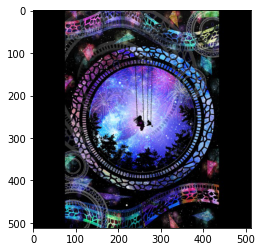

Put 3 dot
Task complete


<Figure size 432x288 with 0 Axes>

In [21]:
im = array(Image.open("222.jpg"))
imshow(im)
show()
print("Put 3 dot")
x = ginput(3)
print("Task complete")
#show()

##Пакет NUmPy

In [22]:
im = array(Image.open("222.jpg"))
print(im.shape, im.dtype)

im = array(Image.open("222.jpg").convert("L"), "f")
print(im.shape, im.dtype)

(512, 512, 3) uint8
(512, 512) float32


In [23]:
im[:, 2] = 100
im[:100, :50].sum()

10000.0

In [24]:
im = array(Image.open("222.jpg").convert("L"))
im2 = 255 - im

im3 = (100.0 / 255) * im + 100
im4 = 255.0 * (im / 255.0) ** 2

In [25]:
print(int(im.min()), int(im.max()))

0 255


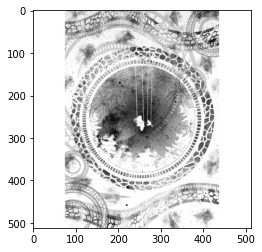

In [26]:
imshow(im2)

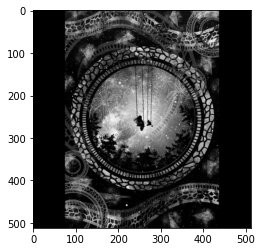

In [27]:
imshow(im3)

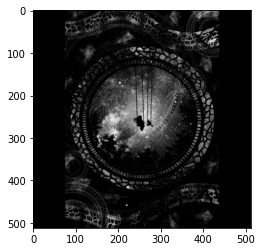

In [28]:
imshow(im4)

In [29]:
pil_im = Image.fromarray(uint8(im2))

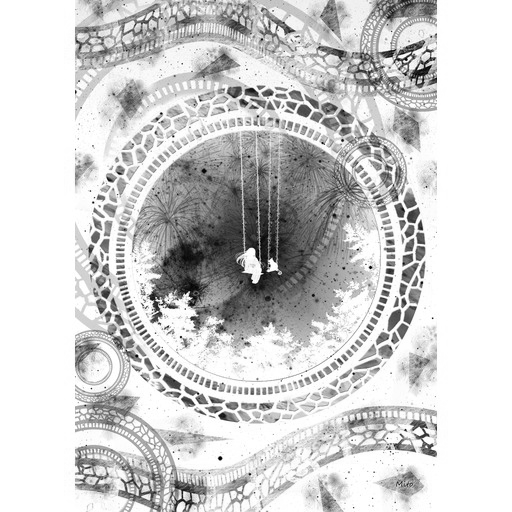

In [30]:
pil_im

In [31]:
def imresize(im, size):
  pil_im = Image.fromarray(uint8(im))
  return array(pil_im.resize(size))

In [32]:
def histeq(im, nbr_bins = 256):
  # пролучить гистограмму изображения

  imhist, bins = histogram(im.flatten(), nbr_bins, normed=True)
  cdf = imhist.cumsum()
  cdf = 255 * cdf / cdf[-1]

  im2 = interp(im.flatten(), bins[:-1], cdf)
  return im2.reshape(im.shape), cdf

In [33]:
im = array(Image.open("222.jpg").convert("L"))
im2, cdf = histeq(im)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


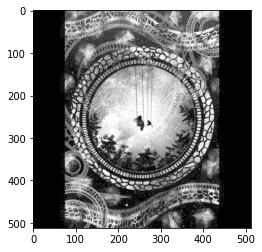

In [34]:
imshow(im2)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
         2.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,  2.,  2.,
         1.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,
         2.,  1.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
         3.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  3.,  2.,
         2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,
         4.,  4.,  4.,  4.,  5.,  4.,  6.,  6.,  8., 12., 33.]),
 array([ 78.0065918 ,  79.3893528 ,  80.7721138 ,  82.1548748 ,
         83.5376358 ,  84.9203968 ,  86.30315781,  87.68591881,
         89.06867981,  90.45144081,  91.83420181,  93.21696281,
         94.59972382,  95.98248482,  97.36524582,  98.74800682,
        100.13076782, 

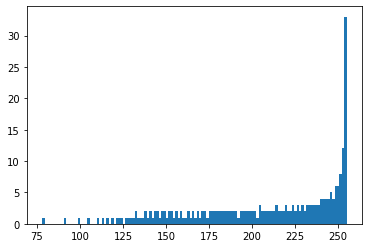

In [35]:
hist(cdf, 128)

In [36]:
def compute_average(imlist):

  averageim = array(Image.open(imlist[0]), "f")

  for imname in imlist[1:]:
    try:
      averageim += array(Image.open(imaname))
    except:
      print(imname + "...skiped")
      averageim /= len(imlist)
  
  return array(averageim, "uint8")

In [37]:
def pca(X):
  num_data, dim = X.shape

  mean_X = X.mean(axis=0)
  X = X - mean_X

  if dim > num_data:
    M = dot(X, X.T)
    e, EV = linalg.eigh(M)
    tmp = dot(X.T, EV).T
    V = tmp[::-1]

    S = sqrt(e)[::-1]

    for i in range(V.shape[1]):
      V[:, i] /= S
  
  else:
    U, S, V = linalg.svd(X)
    V = V[:num_data]

  return V, S, mean_X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


ValueError: ignored

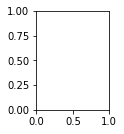

In [38]:
from numpy import *
from pylab import *

imlist = ["222.jpg"]
im = array(Image.open(imlist[0]))

m, n = im.shape[0:2]
imnbr = len(imlist)

immatrix = array([array(Image.open(im)).flatten() for im in imlist], 'f')

V, S, immean = pca(immatrix)

figure()
gray()
subplot(2, 4, 1)
imshow(immean.reshape(m, n))
for i in range(7):
  subplot(2, 4, i+2)
  imshow(V[i].reshape(m, n))

show()

In [41]:
import pickle
f = open('22.jpg', 'wb')
pickle.dump(immean, f)
pickle.dump(V, f)
f.close()

In [42]:
f = open('22.jpg', 'rb')
immean = pickle.load(f)
V = pickle.load(f)
f.close()

In [43]:
with open('222.jpg', 'wb') as f:
  pickle.dump(immean, f)
  pickle.dump(V, f)

In [44]:
with open('222.jpg', 'rb') as f:
  immean = pickle.load(f)
  V = pickle.load(f)

In [45]:
savetxt('test.txt', x, '%i')

In [46]:
x = loadtxt('test.txt')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: loadtxt: Empty input file: "test.txt"
  """Entry point for launching an IPython kernel.


##Пакет SciPy

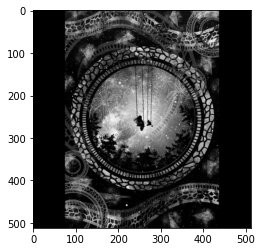

In [52]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im = array(Image.open('222.jpg').convert('L'))
im2 = filters.gaussian_filter(im, 5)
imshow(im2)

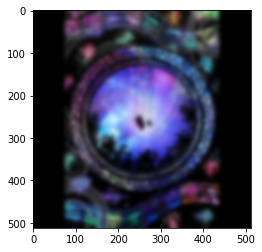

In [54]:
im = array(Image.open('222.jpg'))
im2 = zeros(im.shape)

for i in range(3):
  im2[:, :, i] = filters.gaussian_filter(im[:, :, i], 5)

im2 = uint8(im2)
imshow(im2)

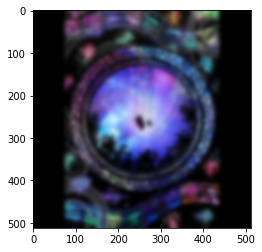

In [55]:
im2 = array(im2, 'uint8')
imshow(im2)

##Производные изображения

In [56]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im = array(Image.open('222.jpg').convert('L'))

imx = zeros(im.shape)
filters.sobel(im, 1, imx)

imy = zeros(im.shape)
filters.sobel(im, 0, imy)

magnitude = sqrt(imx**2 + imy**2)


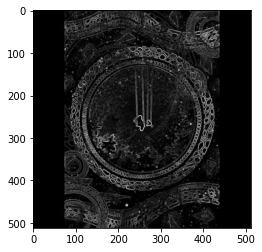

In [65]:
imshow(magnitude)


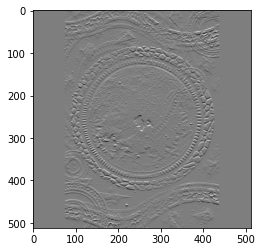

In [66]:
imshow(imy)

In [70]:
sigma = 10

imx = zeros(im.shape)
filters.gaussian_filter(im, (sigma, sigma), (0, 1), imx)

imy = zeros(im.shape)
filters.gaussian_filter(im, (sigma, sigma), (1, 0), imy)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

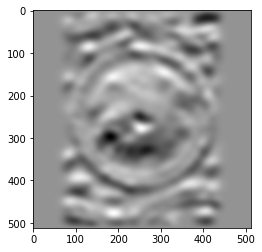

In [71]:
imshow(imy)

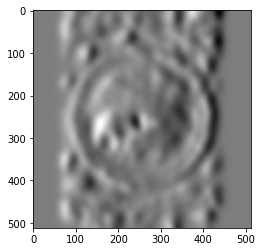

In [72]:
imshow(imx)

In [73]:
from scipy.ndimage import measurements, morphology

im = array(Image.open('222.jpg').convert('L'))
im = 1 * (im < 128)

labels, nbr_objects = measurements.label(im)
print(f"Количестов объектов : {nbr_objects}")

Количестов объектов : 639


In [74]:
im_open = morphology.binary_opening(im, ones((9, 5)), iterations=2)

labels_open, nbr_objects_open = measurements.label(im_open)
print(f"Количестов объектов : {nbr_objects_open}")

Количестов объектов : 12


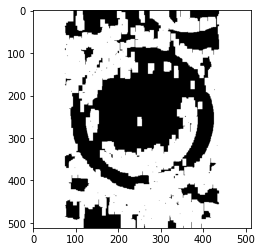

In [78]:
imshow(im_open)

In [89]:
from numpy import *

def denoise(im, U_init, tolerance=0.1, tau=0.125, tv_weight=100):
  m, n = im.shape

  U = U_init
  Px = im
  Py = im
  error = 1

  while(error > tolerance):
    Uold = U
    GradUx = roll(U, -1, axis=1) - U
    GradUy = roll(U, -1, axis=0) - U

    PxNew = Px + (tau / tv_weight) * GradUx
    PyNew = Py + (tau / tv_weight) * GradUy
    NormNew = maximum(1, sqrt(PxNew**2 + PyNew**2))
    Px = PxNew / NormNew
    Py = PyNew / NormNew

    RxPx = roll(Px, 1, axis=1)
    RyPy = roll(Py, 1, axis=1)

    DivP = (Px - RxPx) + (Py - RyPy)
    U = im + tv_weight * DivP

    error = linalg.norm(U - Uold) / sqrt(n * m)
  return U, im - U

In [90]:
from numpy import *
from numpy import random
from scipy.ndimage import filters

im = zeros((500, 500))
im[100:400, 100:400] = 128
im[200:300, 200:300] = 255
im = im + 30 * random.standard_normal((500, 500))

U, T = denoise(im, im)
G = filters.gaussian_filter(im, 10)

In [ ]:
imshow(im)

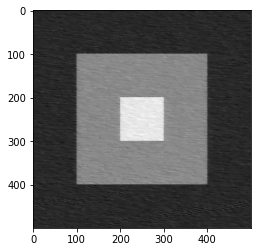

In [91]:
imshow(U)

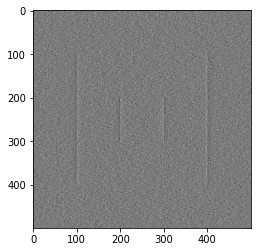

In [92]:
imshow(T)

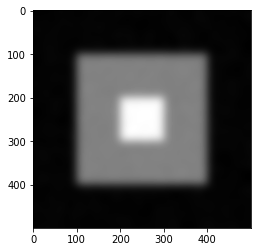

In [93]:
imshow(G)

In [ ]:
from PIL import Image
from pylab import *

im = array(Image.open('222.jpg').convert('L'))
U, T = denoise(im, im)

figure()
gray()
imshow(U)
axis('equal')
axis('off')
show()